In [1]:
import cAlg as cAlg
print(dir(cAlg))
cAlg.mainfort()

['__doc__', '__f2py_numpy_version__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', '_cAlg_error', 'dealloc_chunk', 'dealloc_struct', 'fmodel_wrapper', 'get_rain_type', 'init_random_seed', 'init_random_seed2', 'mainfort', 'pass_file_names', 'radarretsub2', 'set_gmi_data', 'testr']
 Random Seeds :     74848408           1
           1


           8
imu:     1  mu:    -2.0000  mu_tab:    -2.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     2  mu:    -1.0000  mu_tab:    -1.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     3  mu:     0.0000  mu_tab:     0.0000
   10.6499996    
   18.7000008    
   23.7999992    
   35.5000000    
   89.0000000    
   165.500000    
   183.300003    
imu:     4  mu:     1.0000  mu_tab:     1.0000
   10.6499996    
   18.7000008    
   23.7999992

In [9]:
f1C11='data/1C-CS-92W47N60W21N.GPM.GMI.XCAL2016-C.20241009-S035045-E035921.060269.V07B.HDF5'
fDPR='data/2A-CS-92W47N60W21N.GPM.DPR.V9-20240130.20241009-S035207-E035919.060269.V07C.HDF5'
f2AKu='data/2A-CS-92W47N60W21N.GPM.Ku.V9-20240130.20241009-S035207-E035919.060269.V07C.HDF5'
f2ENv='data/2A-ENV.GPM.Ku.V9-20240130.20241009-S025626-E042939.060269.V07C.HDF5'
from read_GMI import read_gmi
from read2AKuDPR import read2AKuDPR

import importlib
#importlib.reload(cAlg)
gmi_data=read_gmi(f1C11)
lon_s1, lat_s1, tc_S1, lon_s2, lat_s2, tc_S2, sc_lat, sc_lon, inc_angle_s1, inc_angle_s2, sun_glint_angle_s1,yy,mm,dd,jday=gmi_data
radar_data=read2AKuDPR(f2AKu,fDPR,0,300)
zKuObs,binRealSurface,localZenithAngle,elevation,binClutterFree,binZeroDegree,piaHB,srtrelPIAku,NSRelibFlag,raintype,snowIceCover,seaIceConcentration,snrRatioku,srtPIAku,srtsigmaPIAku,sigmaZeroKu,freeZH,envTemp,missing_flag,dataquality_flag,modestatus_flag,iLandOcean,flagPrecip,sfcRain,zKaObs,dsrtPIAKa,dsrtPIAKu,dsrtrelPIA,MSRelibFlag,dsrtsigmaPIAku,xlon,xlat,yy_radar,jday_radar,mp_nodes=radar_data
#tpwC=cAlg.set_gmi_data(tc_S1.T,lat_s1.T,lon_s1.T,tc_S2.T,lat_s2.T,lon_s2.T,sc_lon,sc_lat,inc_angle_s1[:,:,0].T,inc_angle_s2[:,:,0].T,mm[0],jday[0])
sysdn=-0.25
nMemb=10
n_mu=5
n_max_freq=8

#print(inc_angle_s1.shape)
#print(inc_angle_s2.shape)
#print(sun_glint_angle_s1.shape)

In [11]:
#zKuObs,binRealSurface,localZenithAngle,elevation,binClutterFree,binZeroDegree,piaHB,srtrelPIAku,NSRelibFlag,raintype,snowIceCover,seaIceConcentration,snrRatioku,srtPIAku,srtsigmaPIAku,sigmaZeroKu,freeZH,envTemp,missing_flag,dataquality_flag,modestatus_flag,iLandOcean,flagPrecip,sfcRain,zKaObs,dsrtPIAKa,dsrtPIAKu,dsrtrelPIA,MSRelibFlag,dsrtsigmaPIAku,xlon,xlat,yy_radar,jday_radar,mp_nodes
import numpy as np  

a=np.nonzero(raintype>0)
sfcPrecip2=np.zeros((raintype.shape[0],raintype.shape[1]),float)
for iprof in range(0,len(a[0])):
    if raintype[a[0][iprof],a[1][iprof]]==3:
        continue
    itype=raintype[a[0][iprof],a[1][iprof]]

    z13obs=zKuObs[a[0][iprof],a[1][iprof]]
    z35obs=zKaObs[a[0][iprof],a[1][iprof]]
    nodes=mp_nodes[a[0][iprof],a[1][iprof]]
    isurf=binRealSurface[a[0][iprof],a[1][iprof]]
    imu=3
    log10dnp=np.zeros((88),float)
    dr=0.25
    ic,jc=1,1
    nmfreq=8
    hfreez=freeZH[a[0][iprof],a[1][iprof]]/1e3
    pia13srt=srtPIAku[a[0][iprof],a[1][iprof]]
    pia35srt=-999.9
    imemb=1
    localzangle=localZenithAngle[a[0][iprof],a[1][iprof]]
    wfractpix=0.0
    xs=np.zeros((15),float)
    nstda=0.125
    reliabflag_py=0
    isurf=isurf//2
    z13obs=10*np.log10((10**(z13obs[::2]/10.)+10**(z13obs[1::2]/10.)+1e-5)/2)
    z35obs=10*np.log10((10**(z35obs[::2]/10.)+10**(z35obs[1::2]/10.)+1e-5)/2)
    ichunk=0

    z13,z35,pia35m,pia13m,z35mod,pwc,salb,kext,asym,rrate,dm,log10dn = cAlg.fmodel_wrapper(z13obs,z35obs,nodes,isurf,imu,log10dnp,dr,ic,jc,nmfreq,itype,hfreez,pia13srt,pia35srt,imemb,localzangle,wfractpix,xs,ichunk,nstda,reliabflag_py)
    sfcPrecip2[a[0][iprof],a[1][iprof]]=rrate[nodes[4]]

[[1.         0.64994158]
 [0.64994158 1.        ]]


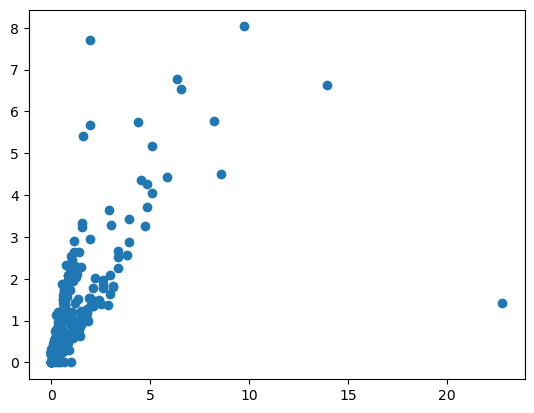

In [19]:
b=np.nonzero(sfcPrecip2[a]>=0)
plt.scatter(sfcPrecip2[a][b],sfcRain[a][b])
print(np.corrcoef(sfcPrecip2[a][b],sfcRain[a][b]))

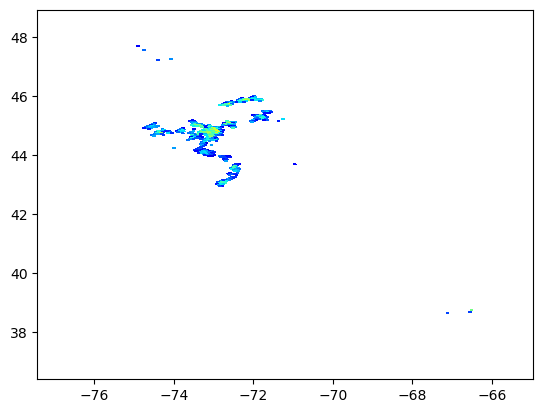

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.pcolormesh(xlon,xlat,sfcRain,norm=colors.LogNorm(vmin=0.1, vmax=100),cmap='jet')

In [5]:
print(pia13m)
print(pia35m)
print(dm[nodes])

0.49616312980651855
2.5824177265167236
[0.9425711 1.4003097 0.9341983 0.        0.9341983]


/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_30395/3016030523.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_s1,lat_s1,tpwC.T,vmin=0,cmap='jet')


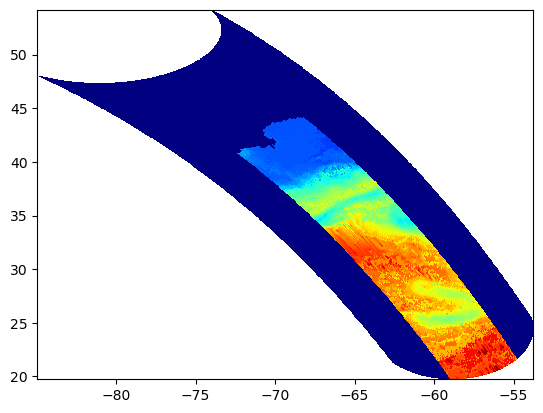

In [5]:
import matplotlib.pyplot as plt
plt.pcolormesh(lon_s1,lat_s1,tpwC.T,vmin=0,cmap='jet')    